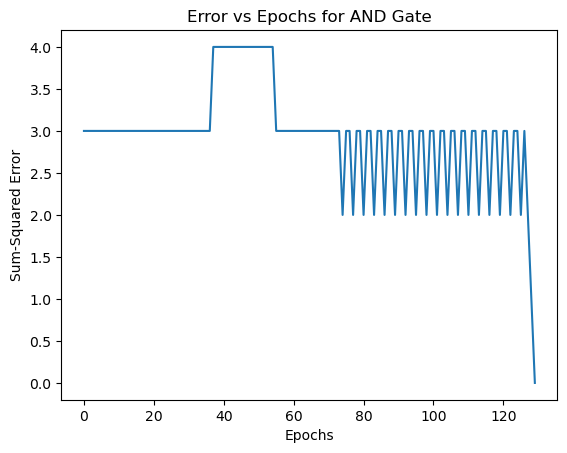

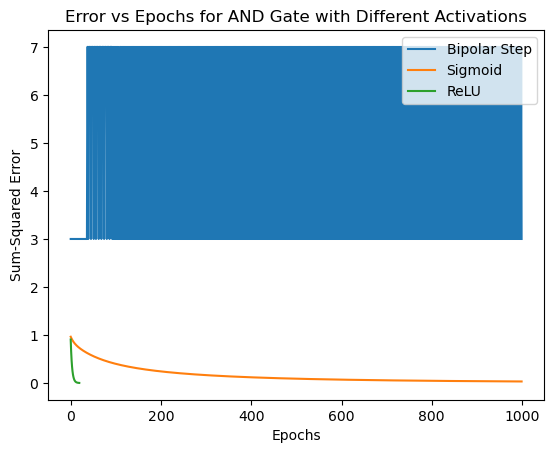

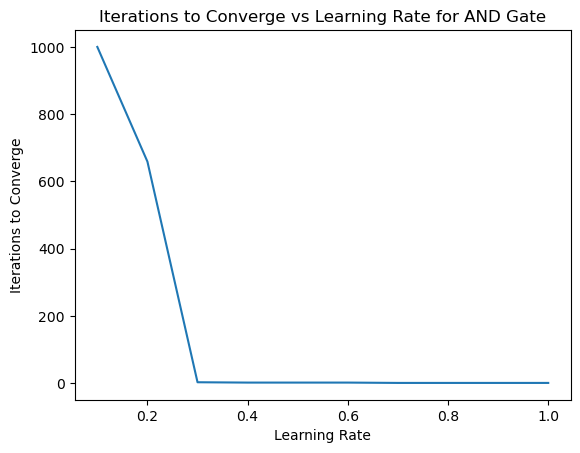

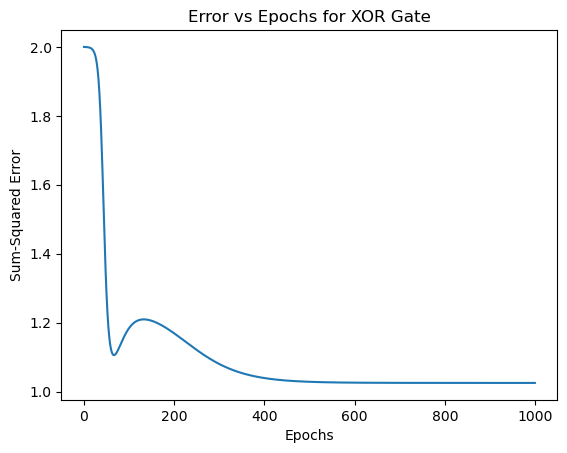

C:\Users\manik\AppData\Local\Temp\ipykernel_1572\2363149704.py:20: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


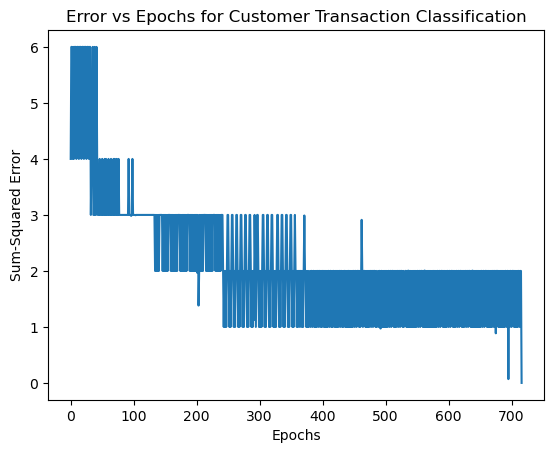

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# A1: Summation Unit
def summation_unit(inputs, weights):
    """Calculate the weighted sum of inputs."""
    return np.dot(inputs, weights)

# A1: Activation Functions
def step_activation(x):
    """Step activation function."""
    return np.where(x >= 0, 1, 0)

def bipolar_step_activation(x):
    """Bipolar step activation function."""
    return np.where(x >= 0, 1, -1)

def sigmoid_activation(x):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

def relu_activation(x):
    """ReLU activation function."""
    return np.maximum(0, x)

def leaky_relu_activation(x):
    """Leaky ReLU activation function."""
    return np.where(x > 0, x, 0.01 * x)

# A1: Error Calculation
def calculate_error(target, output):
    """Calculate the sum squared error."""
    return np.sum((target - output) ** 2)

# A2: Perceptron Learning Algorithm
def perceptron_learning(inputs, targets, activation_func, weights, learning_rate, max_epochs=1000, convergence_threshold=0.002):
    """Train the perceptron using the specified activation function."""
    errors = []
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(inputs)):
            # Calculate the weighted sum
            weighted_sum = summation_unit(inputs[i], weights)
            # Apply activation function
            output = activation_func(weighted_sum)
            # Calculate error
            error = targets[i] - output
            total_error += error ** 2
            # Update weights
            weights += learning_rate * error * inputs[i]
        
        errors.append(total_error)
        if total_error <= convergence_threshold:
            break
    return weights, errors, epoch + 1

# A2: AND Gate Training
def train_and_gate():
    """Train the perceptron on the AND gate logic."""
    # Add a bias term (1) to the inputs
    and_inputs = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])  # Bias input added
    and_targets = np.array([0, 0, 0, 1])  # Target outputs for AND
    weights = np.array([10, 0.2, -0.75])  # Adjusted weights to match inputs
    learning_rate = 0.05
    
    final_weights, error_values, epochs = perceptron_learning(and_inputs, and_targets, step_activation, weights, learning_rate)
    
    plt.plot(error_values)
    plt.title('Error vs Epochs for AND Gate')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Squared Error')
    plt.show()

# A3: Train with different activation functions
def train_with_different_activations():
    """Train the perceptron on the AND gate logic with different activation functions."""
    and_inputs = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])  # Bias input added
    and_targets = np.array([0, 0, 0, 1])  # Target outputs for AND
    weights = np.array([10, 0.2, -0.75])
    learning_rate = 0.05
    
    activation_functions = {
        "Bipolar Step": bipolar_step_activation,
        "Sigmoid": sigmoid_activation,
        "ReLU": relu_activation
    }
    
    for name, func in activation_functions.items():
        final_weights, error_values, epochs = perceptron_learning(and_inputs, and_targets, func, weights, learning_rate)
        plt.plot(error_values, label=name)
    
    plt.title('Error vs Epochs for AND Gate with Different Activations')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Squared Error')
    plt.legend()
    plt.show()

# A4: Varying Learning Rate
def varying_learning_rate():
    """Test the perceptron with varying learning rates."""
    and_inputs = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])  # Bias input added
    and_targets = np.array([0, 0, 0, 1])  # Target outputs for AND
    weights = np.array([10, 0.2, -0.75])
    
    learning_rates = np.arange(0.1, 1.1, 0.1)
    iterations = []
    
    for lr in learning_rates:
        final_weights, error_values, epochs = perceptron_learning(and_inputs, and_targets, sigmoid_activation, weights, lr)
        iterations.append(epochs)
    
    plt.plot(learning_rates, iterations)
    plt.title('Iterations to Converge vs Learning Rate for AND Gate')
    plt.xlabel('Learning Rate')
    plt.ylabel('Iterations to Converge')
    plt.show()

# A5: XOR Gate Training
def train_xor_gate():
    """Train the perceptron on the XOR gate logic."""
    xor_inputs = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])  # Bias input added
    xor_targets = np.array([0, 1, 1, 0])  # Target outputs for XOR
    weights = np.array([10, 0.2, -0.75])
    learning_rate = 0.05
    
    final_weights, error_values, epochs = perceptron_learning(xor_inputs, xor_targets, sigmoid_activation, weights, learning_rate)
    
    plt.plot(error_values)
    plt.title('Error vs Epochs for XOR Gate')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Squared Error')
    plt.show()

# A6: Customer Transaction Classification
def classify_customer_transactions():
    """Classify customer transactions as high or low value."""
    # Sample customer data (Candies, Mangoes, Milk Packets, Payment)
    customer_data = np.array([
        [20, 6, 2, 386],
        [16, 3, 6, 289],
        [27, 6, 2, 393],
        [19, 1, 2, 110],
        [24, 4, 2, 280],
        [22, 1, 5, 167],
        [15, 4, 2, 271],
        [18, 4, 2, 274],
        [21, 1, 4, 148],
        [16, 2, 4, 198]
    ])
    # High value transactions (1 for Yes, 0 for No)
    targets = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])
    weights = np.random.rand(4)  # Random initialization of weights
    learning_rate = 0.05
    
    final_weights, error_values, epochs = perceptron_learning(customer_data, targets, sigmoid_activation, weights, learning_rate)
    
    plt.plot(error_values)
    plt.title('Error vs Epochs for Customer Transaction Classification')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Squared Error')
    plt.show()

# Main execution
if __name__ == "__main__":
    train_and_gate()
    train_with_different_activations()
    varying_learning_rate()
    train_xor_gate()
    classify_customer_transactions()